**Target:**

- Adding regularisation as it was overfitting, add dropout of 5 percent to every layer as I am not GODFATHER.

**Results:**

- Parameters: 7.86k
- Best Training Accuracy: 99.23
- Best Test Accuracy: 99.31

**Analysis:**

- Model is not overfitting at all, now.
- But it will not go further if we keep pushing.
- Seeing image samples, we can see that we can add some augmentation to increase our dataset.

In [1]:
import torch
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms, datasets
from torchsummary import summary
import matplotlib.pyplot as plt
from models import Net6
from utils import train, test

In [2]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net6().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
       BatchNorm2d-3            [-1, 8, 26, 26]              16
           Dropout-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 16, 24, 24]           1,152
              ReLU-6           [-1, 16, 24, 24]               0
       BatchNorm2d-7           [-1, 16, 24, 24]              32
           Dropout-8           [-1, 16, 24, 24]               0
            Conv2d-9            [-1, 8, 24, 24]             128
        MaxPool2d-10            [-1, 8, 12, 12]               0
           Conv2d-11           [-1, 12, 10, 10]             864
             ReLU-12           [-1, 12, 10, 10]               0
      BatchNorm2d-13           [-1, 12, 10, 10]              24
          Dropout-14           [-1, 12,

In [3]:
torch.manual_seed(1)
batch_size = 128

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.1307,), (0.3081,)),
                                ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)


100%|██████████| 9912422/9912422 [00:00<00:00, 105484360.28it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 25944676.34it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 25323288.55it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 12708825.06it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



In [4]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

In [5]:
model = Net6().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
    print(f'Epoch {epoch}')
    train_losses, train_acc = train(model, device, train_loader, optimizer, criterion, train_losses, train_acc)
    test_losses, test_acc = test(model, device, test_loader, criterion, test_losses, test_acc)

Epoch 1


Train: Loss=0.0761 Batch_id=468 Accuracy=91.76: 100%|██████████| 469/469 [00:22<00:00, 20.79it/s]


Test set: Average loss: 0.0675, Accuracy: 9814/10000 (98.14%)

Epoch 2


Train: Loss=0.0770 Batch_id=468 Accuracy=98.12: 100%|██████████| 469/469 [00:23<00:00, 20.13it/s]


Test set: Average loss: 0.0466, Accuracy: 9857/10000 (98.57%)

Epoch 3


Train: Loss=0.0275 Batch_id=468 Accuracy=98.50: 100%|██████████| 469/469 [00:22<00:00, 20.93it/s]


Test set: Average loss: 0.0433, Accuracy: 9872/10000 (98.72%)

Epoch 4


Train: Loss=0.0527 Batch_id=468 Accuracy=98.69: 100%|██████████| 469/469 [00:22<00:00, 21.00it/s]


Test set: Average loss: 0.0329, Accuracy: 9898/10000 (98.98%)

Epoch 5


Train: Loss=0.0104 Batch_id=468 Accuracy=98.81: 100%|██████████| 469/469 [00:22<00:00, 20.81it/s]


Test set: Average loss: 0.0315, Accuracy: 9911/10000 (99.11%)

Epoch 6


Train: Loss=0.0510 Batch_id=468 Accuracy=98.92: 100%|██████████| 469/469 [00:22<00:00, 20.62it/s]


Test set: Average loss: 0.0303, Accuracy: 9906/10000 (99.06%)

Epoch 7


Train: Loss=0.0137 Batch_id=468 Accuracy=98.99: 100%|██████████| 469/469 [00:22<00:00, 21.04it/s]


Test set: Average loss: 0.0294, Accuracy: 9905/10000 (99.05%)

Epoch 8


Train: Loss=0.0840 Batch_id=468 Accuracy=99.04: 100%|██████████| 469/469 [00:22<00:00, 20.88it/s]


Test set: Average loss: 0.0253, Accuracy: 9920/10000 (99.20%)

Epoch 9


Train: Loss=0.0281 Batch_id=468 Accuracy=99.07: 100%|██████████| 469/469 [00:22<00:00, 20.93it/s]


Test set: Average loss: 0.0302, Accuracy: 9906/10000 (99.06%)

Epoch 10


Train: Loss=0.0274 Batch_id=468 Accuracy=99.08: 100%|██████████| 469/469 [00:22<00:00, 20.40it/s]


Test set: Average loss: 0.0266, Accuracy: 9917/10000 (99.17%)

Epoch 11


Train: Loss=0.0331 Batch_id=468 Accuracy=99.13: 100%|██████████| 469/469 [00:22<00:00, 20.98it/s]


Test set: Average loss: 0.0283, Accuracy: 9907/10000 (99.07%)

Epoch 12


Train: Loss=0.0212 Batch_id=468 Accuracy=99.22: 100%|██████████| 469/469 [00:22<00:00, 20.79it/s]


Test set: Average loss: 0.0217, Accuracy: 9931/10000 (99.31%)

Epoch 13


Train: Loss=0.0155 Batch_id=468 Accuracy=99.18: 100%|██████████| 469/469 [00:22<00:00, 20.69it/s]


Test set: Average loss: 0.0240, Accuracy: 9920/10000 (99.20%)

Epoch 14


Train: Loss=0.0396 Batch_id=468 Accuracy=99.21: 100%|██████████| 469/469 [00:22<00:00, 20.72it/s]


Test set: Average loss: 0.0238, Accuracy: 9920/10000 (99.20%)

Epoch 15


Train: Loss=0.0445 Batch_id=468 Accuracy=99.23: 100%|██████████| 469/469 [00:22<00:00, 20.59it/s]


Test set: Average loss: 0.0230, Accuracy: 9919/10000 (99.19%)



Text(0.5, 1.0, 'Test Accuracy')

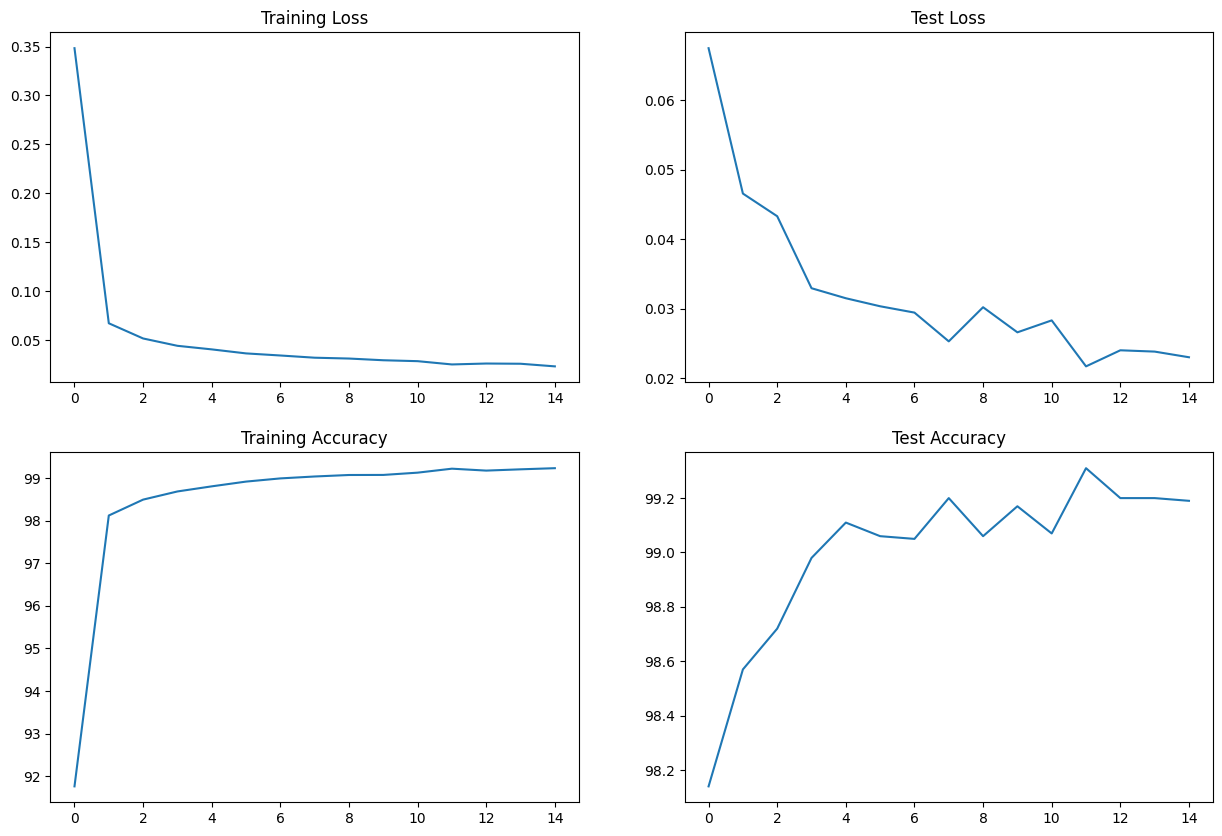

In [6]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

In [7]:
print("best train accuracy : ", max(train_acc))
print("best test accuracy : ", max(test_acc))

best train accuracy :  99.23333333333333
best test accuracy :  99.31


In [8]:
print("best train loss : ", min(train_losses))
print("best test loss : ", min(test_losses))

best train loss :  0.02318198364704593
best test loss :  0.02167974274456501
